In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('fraud-detection.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,0b242abb623afc578575680df30655b9,Jennifer,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,1f76529f8574734946361c461b024d99,Stephanie,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,a1a22d70485983eac12b5b88dad1cf95,Edward,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,6b849c168bdad6f867558c3793159a81,Jeremy,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,1/12/1967,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,a41d7549acf90789359a9aa5346dcb46,Tyler,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['trans_num']=le.fit_transform(data['trans_num'])
data['first']=le.fit_transform(data['first'])
data['trans_date_trans_time']=le.fit_transform(data['trans_date_trans_time'])
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,0,7,35,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,1325376018,36.011293,-82.048315,0
1,1,0,18,68,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,0,73,21,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,1,45,36,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,1/12/1967,1325376076,47.034331,-112.561071,0
4,4,2,74,76,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [4]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
trans_num                0
first                    0
cc_num                   0
merchant                 0
category                 0
amt                      0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,108.0,5.350000e+01,3.132092e+01,0.000000e+00,2.675000e+01,5.350000e+01,8.025000e+01,1.070000e+02
trans_date_trans_time,108.0,3.097222e+01,1.892309e+01,0.000000e+00,1.575000e+01,3.050000e+01,4.725000e+01,6.500000e+01
trans_num,108.0,5.350000e+01,3.132092e+01,0.000000e+00,2.675000e+01,5.350000e+01,8.025000e+01,1.070000e+02
first,108.0,3.820370e+01,2.276649e+01,0.000000e+00,1.575000e+01,3.950000e+01,5.625000e+01,7.800000e+01
cc_num,108.0,4.164294e+17,1.304583e+18,6.049559e+10,2.047500e+14,3.510000e+15,4.712500e+15,4.960000e+18
amt,108.0,7.929111e+01,7.253344e+01,1.820000e+00,4.275500e+01,6.023500e+01,9.455500e+01,3.416700e+02
zip,108.0,4.725331e+04,2.826934e+04,1.545000e+03,2.143800e+04,4.785050e+04,7.183325e+04,9.916000e+04
lat,108.0,3.891600e+01,5.120060e+00,2.008270e+01,3.638490e+01,3.983655e+01,4.217772e+01,4.888780e+01
long,108.0,-9.068918e+01,1.529517e+01,-1.554880e+02,-9.897010e+01,-8.724110e+01,-7.961125e+01,-6.996560e+01
city_pop,108.0,6.862706e+04,2.269826e+05,4.600000e+01,6.232500e+02,2.180000e+03,1.921175e+04,1.577385e+06


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'trans_date_trans_time'}>,
        <Axes: title={'center': 'trans_num'}>,
        <Axes: title={'center': 'first'}>],
       [<Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>, <Axes: title={'center': 'zip'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >, <Axes: >]],
      dtype=object)

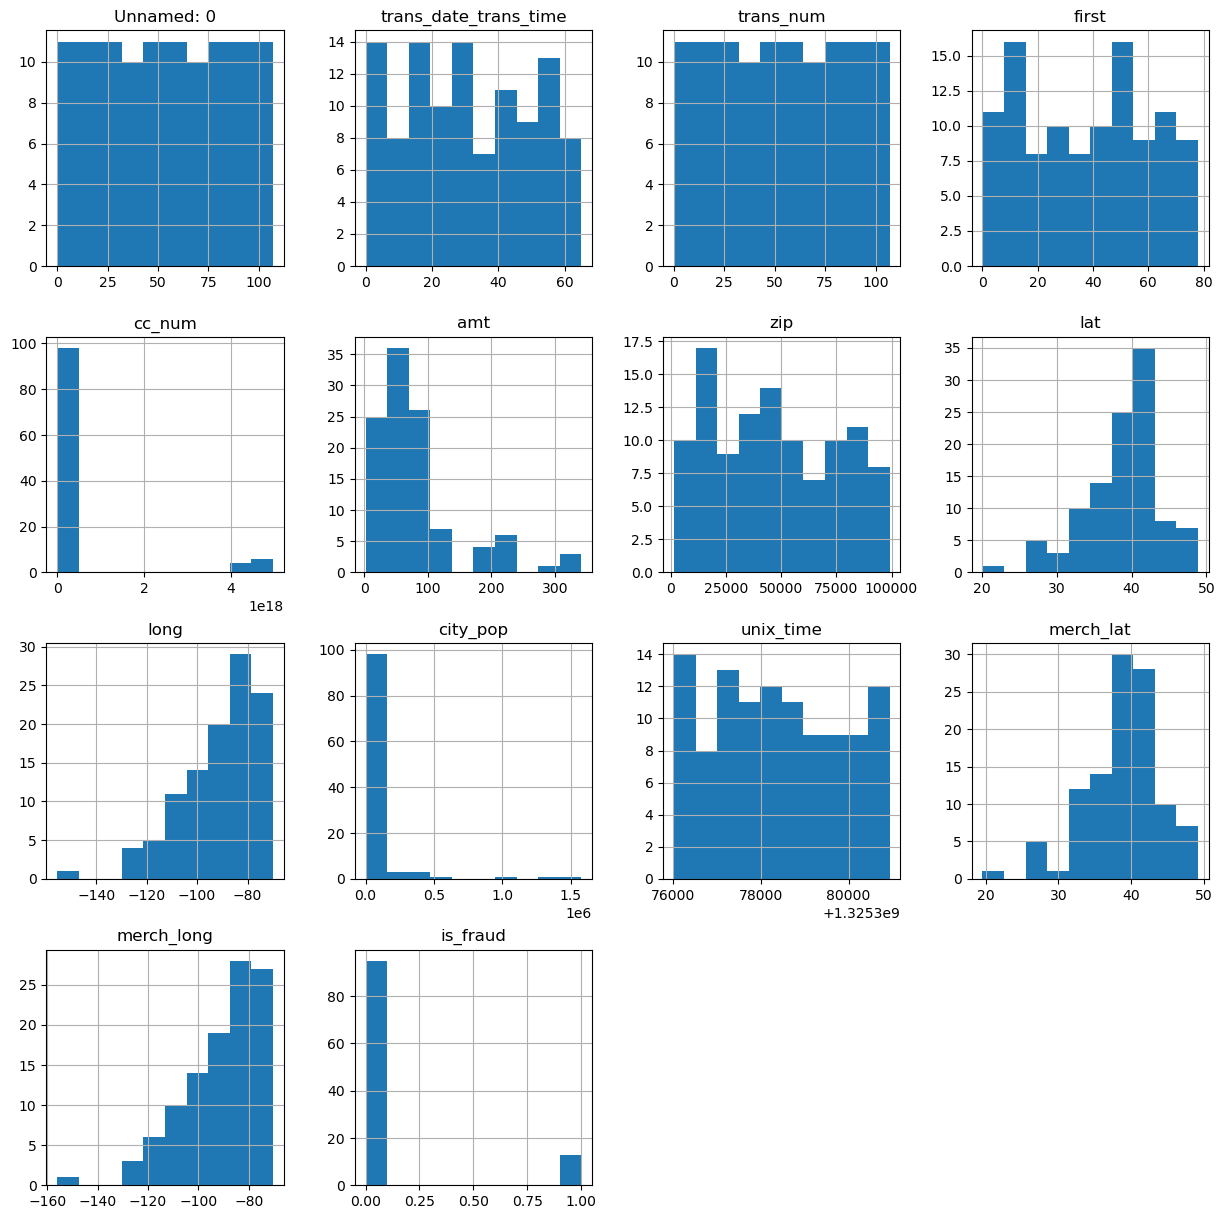

In [6]:
data.hist(figsize=(15,15))

In [6]:
x=data.iloc[:,1:4]
x.head()

,trans_date_trans_time,trans_num,first
0,0,7,35
1,0,18,68
2,0,73,21
3,1,45,36
4,2,74,76


In [7]:
y=data.iloc[:,-1:]
y.head()

,is_fraud
0,0
1,0
2,0
3,0
4,0


In [28]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print("Training Started.....\n")
print()
lin_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=lin_reg.predict(xtest)
print("predicted Total Payment\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....




Training completed....

Testing invoked
predicted Total Payment
 [[0.11712863]
 [0.11003034]
 [0.0176837 ]
 [0.18863896]
 [0.07282399]
 [0.03035035]
 [0.04319515]
 [0.16336759]
 [0.20625701]
 [0.0539204 ]
 [0.09135367]
 [0.04737308]
 [0.14516059]
 [0.06092676]
 [0.10029318]
 [0.1542319 ]
 [0.06124171]
 [0.1337447 ]
 [0.16647322]
 [0.08165883]
 [0.13537361]
 [0.13769867]]

 Testing is also completed....



In [30]:
diff=ytest-ypred
diff

,is_fraud
77,0.882871
10,-0.110030
4,-0.017684
83,-0.188639
62,-0.072824
67,-0.030350
30,-0.043195
45,-0.163368
95,0.793743
11,-0.053920


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))
print()
print('R-Square: \t', r2_score (ytest, ypred))


Mean Squared Error: 	 0.10849815903673789

RMSE: 	 0.32939058735297505

Variance Score:	 0.08685531192845297

R-Square: 	 0.07871738642489245


In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(xtrain, ytrain)
X_test_lda = lda.transform(xtest)

regression_model = LinearRegression()
regression_model.fit(X_train_lda, ytrain)

y_pred = regression_model.predict(X_test_lda)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.1084981590367379


C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_lda)
X_test_pca = pca.transform(X_test_lda)

regression_model = LinearRegression()
regression_model.fit(X_train_pca, ytrain)

y_pred = regression_model.predict(X_test_pca)
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.10849815903673789


In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
}
grid_search = GridSearchCV(estimator=regression_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, ytrain)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.10849815903673789


In [35]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'fit_intercept': [True, False],
}

random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,  
    cv=5,       
    scoring='neg_mean_squared_error',  
    random_state=42  
)

random_search.fit(X_train_pca, ytrain)

best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test_pca)

mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.10849815903673789


C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, ytrain)
X_test_lda = lda.transform(X_test)

pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_lda)
X_test_pca = pca.transform(X_test_lda)

regression_model = LinearRegression()

param_dist = {
    'fit_intercept': [True, False],
}

random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,       
    scoring='neg_mean_squared_error', 
    random_state=42  
)

random_search.fit(X_train_pca, ytrain)

best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.1084981590367379


C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [37]:
data['is_fraud'].value_counts()

0    95
1    13
Name: is_fraud, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
x_resampled

,trans_date_trans_time,trans_num,first
0,0,7,35
1,0,18,68
2,0,73,21
3,1,45,36
4,2,74,76
...,...,...,...
185,52,19,17
186,43,32,14
187,12,101,43
188,41,31,26


In [39]:
y_resampled

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
185,1
186,1
187,1
188,1


In [40]:
import sklearn
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print("Training Started.....\n")
print()
lin_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
Ypred=lin_reg.predict(Xtest)
print("predicted Total Payment\n",ypred)
print('\n Testing is also completed....\n')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(Ytest, Ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(Ytest, Ypred)))
print()
print('Variance Score:\t', explained_variance_score (Ytest,Ypred))
print()
print('R-Square: \t', r2_score (Ytest, Ypred))

Training Started.....




Training completed....

Testing invoked
predicted Total Payment
 [[0.11712863]
 [0.11003034]
 [0.0176837 ]
 [0.18863896]
 [0.07282399]
 [0.03035035]
 [0.04319515]
 [0.16336759]
 [0.20625701]
 [0.0539204 ]
 [0.09135367]
 [0.04737308]
 [0.14516059]
 [0.06092676]
 [0.10029318]
 [0.1542319 ]
 [0.06124171]
 [0.1337447 ]
 [0.16647322]
 [0.08165883]
 [0.13537361]
 [0.13769867]]

 Testing is also completed....

Mean Squared Error: 	 0.3237770204846656

RMSE: 	 0.5690140775803931

Variance Score:	 0.10637869560320701

R-Square: 	 -0.3096190968623451


In [42]:
from sklearn.model_selection import cross_val_score, KFold
regression_model = LinearRegression()
param_dist = {
    'fit_intercept': [True, False],
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=kf, 
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search.fit(X_train_pca, ytrain)
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")
best_model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train_pca, ytrain, cv=kf, scoring='neg_mean_squared_error')
mse_mean = -cv_scores.mean()
print(f"Cross-Validation Mean Squared Error: {mse_mean}")

Best Hyperparameters: {'fit_intercept': True}
Cross-Validation Mean Squared Error: 0.11540081732639884


C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [43]:
from sklearn.model_selection import cross_val_score
regression_model = LinearRegression()
num_folds = 5 
mse_scores = -cross_val_score(regression_model, X_train_pca, ytrain, cv=num_folds, scoring='neg_mean_squared_error')

average_mse = mse_scores.mean()
print(f"Average Mean Squared Error from {num_folds}-fold cross-validation: {average_mse}")
regression_model.fit(X_train_pca, ytrain)
y_pred = regression_model.predict(X_test_pca)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

Average Mean Squared Error from 5-fold cross-validation: 0.1043813033141141
Mean Squared Error on the test set: 0.1084981590367379


In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

loocv = KFold(n_splits=len(X_train_pca))
regression_model = LinearRegression()
mse_scores = []
X_train_pca = np.array(X_train_pca)
Ytrain = np.array(Ytrain)
for train_index, test_index in loocv.split(X_train_pca):
    X_train_cv, X_test_cv = X_train_pca[train_index], X_train_pca[test_index]
    y_train_cv, y_test_cv = Ytrain[train_index], Ytrain[test_index] 

    regression_model.fit(X_train_cv, y_train_cv)

    y_pred_cv = regression_model.predict(X_test_cv)
    mse_fold = mean_squared_error(y_test_cv, y_pred_cv)
    mse_scores.append(mse_fold)
mse_mean = np.mean(mse_scores)
print(f"Mean Squared Error (LOOCV): {mse_mean}")


Mean Squared Error (LOOCV): 0.26064677409439946
